# Uber Fares 🚙🚙
In this exercise, we'll use Random Forests in order to estimate the price of a Uber ride.

## Importing libraries and dataset
0. Import the usual libraries and read the dataset from this url:
"https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+Supervis%C3%A9/Decision+trees/uber.csv"

Loading dataset...
...Done.



## Basic exploring and cleaning
1. Display basic statistics about the dataset. Do you notice some inconsistent values?

Number of rows : 20000

Display of dataset: 


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,48462598,2015-05-07 10:24:44.0000004,13.0,2015-05-07 10:24:44 UTC,-73.971664,40.797035,-73.958939,40.777649,1
1,6637611,2014-07-09 09:14:04.0000002,5.5,2014-07-09 09:14:04 UTC,-73.991635,40.749855,-73.988250,40.741341,2
2,8357193,2013-11-11 18:51:00.000000240,8.5,2013-11-11 18:51:00 UTC,-73.982352,40.777042,-73.995912,40.759757,1
3,40466112,2014-05-22 01:54:00.00000069,19.0,2014-05-22 01:54:00 UTC,-73.991455,40.751700,-73.936357,40.812327,1
4,35405035,2011-06-21 23:37:33.0000002,7.7,2011-06-21 23:37:33 UTC,-73.974749,40.756255,-73.952276,40.778332,1



Basics statistics: 


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+04,20000,20000.00000,20000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
unique,NaN,20000,NaN,19967,NaN,NaN,NaN,NaN,NaN
top,NaN,2015-05-07 10:24:44.0000004,NaN,2012-08-28 14:03:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,2,NaN,NaN,NaN,NaN,NaN
mean,2.767949e+07,NaN,11.35815,NaN,-72.490431,39.918498,-72.459891,39.923345,1.690150
std,1.601123e+07,NaN,9.89199,NaN,10.461597,6.051561,10.564266,6.901520,1.311384
min,3.949000e+03,NaN,-23.70000,NaN,-75.419276,-74.006190,-75.423067,-73.991765,0.000000
25%,1.383476e+07,NaN,6.00000,NaN,-73.992075,40.734733,-73.991423,40.734105,1.000000
50%,2.769724e+07,NaN,8.50000,NaN,-73.981904,40.752554,-73.980305,40.752997,1.000000
75%,4.148082e+07,NaN,12.50000,NaN,-73.967229,40.767075,-73.963509,40.768348,2.000000



Percentage of missing values: 


Unnamed: 0           0.0
key                  0.0
fare_amount          0.0
pickup_datetime      0.0
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
passenger_count      0.0
dtype: float64

2. Drop the useless columns and the rows containing outliers.

Dropping two first columns...
Done.

Dropping rows with outliers in fare_amount: 
...Done.
Number of rows:  19998


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,19998.000000,19998,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000
unique,NaN,19965,NaN,NaN,NaN,NaN,NaN
top,NaN,2009-07-14 17:11:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,NaN,NaN
mean,11.360472,NaN,-72.490283,39.918414,-72.459736,39.923259,1.690069
std,9.889051,NaN,10.462110,6.051858,10.564783,6.901859,1.311415
min,0.010000,NaN,-75.419276,-74.006190,-75.423067,-73.991765,0.000000
25%,6.000000,NaN,-73.992074,40.734729,-73.991422,40.734105,1.000000
50%,8.500000,NaN,-73.981904,40.752551,-73.980302,40.752997,1.000000
75%,12.500000,NaN,-73.967234,40.767075,-73.963506,40.768348,2.000000


## Feature engineering
### Dealing with datetime objects
3. Convert the `pickup_datetime` column into datetime format. Use panda's [dt module](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html) to create the following columns:
* Year
* Month
* Day
* Weekday: contains the **name** of the day of week

Then, you can drop the column `pickup_datetime`.

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday
0,13.0,-73.971664,40.797035,-73.958939,40.777649,1,2015,5,7,Thursday
1,5.5,-73.991635,40.749855,-73.988250,40.741341,2,2014,7,9,Wednesday
2,8.5,-73.982352,40.777042,-73.995912,40.759757,1,2013,11,11,Monday
3,19.0,-73.991455,40.751700,-73.936357,40.812327,1,2014,5,22,Thursday
4,7.7,-73.974749,40.756255,-73.952276,40.778332,1,2011,6,21,Tuesday


### Haversine formula

It would be very interesting to compute the ride distance from the GPS coordinates. [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula) allows to do this 🤓:

$$
d = 2r \arcsin \big(\sqrt{\sin^2(\frac{\phi_2 - \phi_1}{2}) + \cos \phi_1 \cos \phi_2 \sin^2(\frac{\lambda_2 - \lambda_1}{2})} \big)
$$

where:
* $d$ is the ride distance in kilometers
* $r$ is the Earth's radius in kilometers
* $\phi_1$ is the pickup latitude in radians
* $\phi_2$ is the dropoff latitude in radians
* $\lambda_1$ is the pickup longitude in radians
* $\lambda_2$ is the dropoff longitude in radians

We've implemented for you a function that computes this formula for one ride with coordinates `lon_1`, `lon_2`, `lat_1` and `lat_2`:

In [7]:
def haversine(lon_1, lon_2, lat_1, lat_2):
    
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  # Convert degrees to Radians
    
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    

    distance_km = 2*6371*np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2)) # earth radius: 6371km
    
    return distance_km

4. Apply the `haversine` function to he whole dataset to create a new column `ride_distance`. [This stackoverflow post](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe?answertab=trending#tab-top) might help you!

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,ride_distance
0,13.0,-73.971664,40.797035,-73.958939,40.777649,1,2015,5,7,Thursday,2.407225
1,5.5,-73.991635,40.749855,-73.988250,40.741341,2,2014,7,9,Wednesday,0.988729
2,8.5,-73.982352,40.777042,-73.995912,40.759757,1,2013,11,11,Monday,2.235651
3,19.0,-73.991455,40.751700,-73.936357,40.812327,1,2014,5,22,Thursday,8.183379
4,7.7,-73.974749,40.756255,-73.952276,40.778332,1,2011,6,21,Tuesday,3.099698


## Preprocessing
5. Separate the target from the features

Separating labels from features...
...Done.

Y : 
0    13.0
1     5.5
2     8.5
3    19.0
4     7.7
Name: fare_amount, dtype: float64

X :
   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.971664        40.797035         -73.958939         40.777649   
1        -73.991635        40.749855         -73.988250         40.741341   
2        -73.982352        40.777042         -73.995912         40.759757   
3        -73.991455        40.751700         -73.936357         40.812327   
4        -73.974749        40.756255         -73.952276         40.778332   

   passenger_count  year  month  day    weekday  ride_distance  
0                1  2015      5    7   Thursday       2.407225  
1                2  2014      7    9  Wednesday       0.988729  
2                1  2013     11   11     Monday       2.235651  
3                1  2014      5   22   Thursday       8.183379  
4                1  2011      6   21    Tuesday       3.099698  


6. Detect names of numeric/categorical features

Found numeric features  ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year', 'month', 'day', 'ride_distance']
Found categorical features  ['weekday']


7. Make a train/test splitting with test_size = 0.2

Dividing into train and test sets...
...Done.



8. Make all the necessary preprocessings.

Hint: in this exercise, we'll first create a baseline model with a multivariate **linear regression**. So don't forget to make all the transformations that are required for this kind of model 😉

Performing preprocessings on train set...
       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
8152         -73.966328        40.757692         -73.958325         40.768067   
1380         -73.988100        40.764807         -74.001052         40.746947   
14079        -74.003445        40.743692         -74.005457         40.738923   
7725         -73.961230        40.760852         -73.957473         40.722320   
14918        -73.966034        40.767998         -73.954902         40.783116   

       passenger_count  year  month  day    weekday  ride_distance  
8152                 1  2012      2   16   Thursday       1.336116  
1380                 1  2013     10   23  Wednesday       2.265861  
14079                1  2009      5   22     Friday       0.556722  
7725                 1  2013     11   10     Sunday       4.296238  
14918                1  2014      4    2  Wednesday       1.924727  
...Done.
[[-0.14344502  0.14080045 -0.14430518  0.1208558

## Baseline: Linear Regression
9. Train a linear regression model and evaluate its performances. Is it satisfying?

Train model...
...Done.


R2 score on training set :  0.02419859579741468
R2 score on test set :  0.017058651115981704


## Random Forest
10. Train a Random Forest model with default hyperparameters. Are the performances better?

Random Forest with default hyperparameters...
...Done.


R2 score on training set :  0.9674644284128262
R2 score on test set :  0.772221101314326


### Grid search
11. Use grid search to tune the model's hyperparameters. You can try the following values:

```
params = {
    'max_depth': [10, 12, 14],
    'min_samples_split': [4, 8],
    'n_estimators': [60, 80, 100]
}
```



Grid search...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END .max_depth=10, min_samples_split=4, n_estimators=60; total time=   2.8s
[CV] END .max_depth=10, min_samples_split=4, n_estimators=60; total time=   2.8s
[CV] END .max_depth=10, min_samples_split=4, n_estimators=60; total time=   2.8s
[CV] END .max_depth=10, min_samples_split=4, n_estimators=80; total time=   3.7s
[CV] END .max_depth=10, min_samples_split=4, n_estimators=80; total time=   3.7s
[CV] END .max_depth=10, min_samples_split=4, n_estimators=80; total time=   3.7s
[CV] END max_depth=10, min_samples_split=4, n_estimators=100; total time=   4.6s
[CV] END max_depth=10, min_samples_split=4, n_estimators=100; total time=   4.6s
[CV] END max_depth=10, min_samples_split=4, n_estimators=100; total time=   4.7s
[CV] END .max_depth=10, min_samples_split=8, n_estimators=60; total time=   2.8s
[CV] END .max_depth=10, min_samples_split=8, n_estimators=60; total time=   2.8s
[CV] END .max_depth=10, min_sampl

### Performances
12. Display the R2-score and the [mean absolute error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html?highlight=mean%20absolute%20error#sklearn.metrics.mean_absolute_error) on train set and test set. What do you think of this model? Would it be interesting to use it to estimate the fares on new data?

R2 score on training set :  0.8773412391126457
R2 score on test set :  0.7793227198490924
Predictions on training set...
...Done.
[ 6.17142586  9.3272303   4.84357674 ...  7.81504034 24.47627732
 10.67468317]

Predictions on test set...
...Done.
[22.10284768  7.84187096 18.5937745  ...  5.27930482  8.80036975
  7.59332401]

Mean Absolute Error on training set :  1.8398203933642716
Mean Fare on training set :  11.330150643830464

Mean Absolute Error on test set :  2.1609093314552403
Mean Fare on test set :  11.481740000000038
Standard-deviation on test set :  9.631479542206511


## Feature importance
13. Make a bar plot with the importances of each feature. Are you surprised?

Names of columns corresponding to each coefficient:  ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year', 'month', 'day', 'ride_distance', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday']


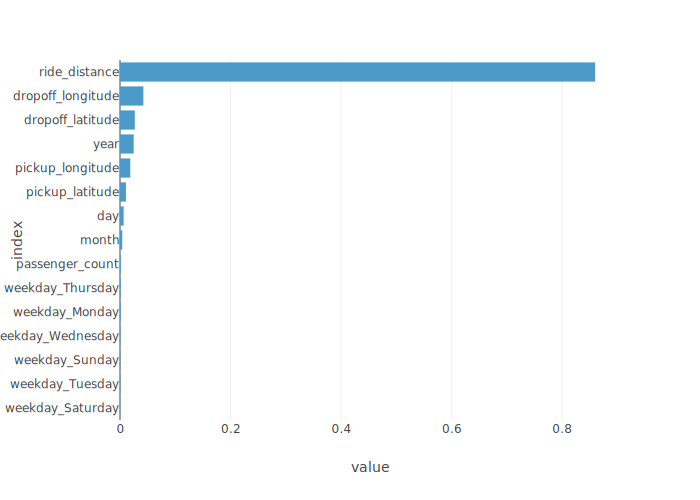

14. Would the model be able to make good predictions if we hadn't included the ride distance by hand? Train a new Random Forest model (with grid search) by dropping the `ride_distance` column from the features, and conclude.

Found numeric features  ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year', 'month', 'day']
Found categorical features  ['weekday']


Dividing into train and test sets...
...Done.



Performing preprocessings on train set...
       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
8152         -73.966328        40.757692         -73.958325         40.768067   
1380         -73.988100        40.764807         -74.001052         40.746947   
14079        -74.003445        40.743692         -74.005457         40.738923   
7725         -73.961230        40.760852         -73.957473         40.722320   
14918        -73.966034        40.767998         -73.954902         40.783116   

       passenger_count  year  month  day    weekday  
8152                 1  2012      2   16   Thursday  
1380                 1  2013     10   23  Wednesday  
14079                1  2009      5   22     Friday  
7725                 1  2013     11   10     Sunday  
14918                1  2014      4    2  Wednesday  
...Done.
[[-0.14344502  0.14080045 -0.14430518  0.12085588 -0.52674365  0.14178757
  -1.22949054  0.03136581  0.          0.          0.          1

Grid search...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END .max_depth=10, min_samples_split=4, n_estimators=60; total time=   2.6s
[CV] END .max_depth=10, min_samples_split=4, n_estimators=60; total time=   2.5s
[CV] END .max_depth=10, min_samples_split=4, n_estimators=60; total time=   2.5s
[CV] END .max_depth=10, min_samples_split=4, n_estimators=80; total time=   3.4s
[CV] END .max_depth=10, min_samples_split=4, n_estimators=80; total time=   3.4s
[CV] END .max_depth=10, min_samples_split=4, n_estimators=80; total time=   3.4s
[CV] END max_depth=10, min_samples_split=4, n_estimators=100; total time=   4.2s
[CV] END max_depth=10, min_samples_split=4, n_estimators=100; total time=   4.2s
[CV] END max_depth=10, min_samples_split=4, n_estimators=100; total time=   4.3s
[CV] END .max_depth=10, min_samples_split=8, n_estimators=60; total time=   2.6s
[CV] END .max_depth=10, min_samples_split=8, n_estimators=60; total time=   2.6s
[CV] END .max_depth=10, min_sampl

R2 score on training set :  0.850107087831722
R2 score on test set :  0.713239229422019
Predictions on training set...
...Done.
[ 7.45782206  8.61356464  7.42620888 ...  7.48197772 25.77105996
  8.8216215 ]

Predictions on test set...
...Done.
[14.02542084  8.62151493  7.51974234 ...  7.44094536  7.82347779
  8.03063538]

Mean Absolute Error on training set :  2.4255949901205986
Mean Fare on training set :  11.330150643830464

Mean Absolute Error on test set :  2.860988261156146
Mean Fare on test set :  11.481740000000038
Standard-deviation on test set :  9.631479542206511
